<h1> Power Cleaning<h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
power=pd.read_excel(r"D:\My Projects\grad project.DEPI\HOUSE_POWER_PROJECT\HOUSE_POWER_PROJECT\Data set\new_power.xlsx")
power

,Index,Global_active_power,Global_reactive_power
0,1,4.216,0.418
1,2,5.360,0.436
2,3,5.374,0.498
3,4,5.388,0.502
4,5,3.666,0.528
...,...,...,...
13351,13352,0.404,0.000
13352,13353,0.402,0.000
13353,13354,0.402,0.000
13354,13355,0.402,0.000


In [6]:
power.dtypes

Index                      int64
Global_active_power      float64
Global_reactive_power    float64
dtype: object

In [7]:
new_columns_name = {
    'Global_active_power':'Global_active_power KW',
    'Global_reactive_power':'Global_reactive_power KW'
    }
power.rename(columns = new_columns_name, inplace = True)
power

,Index,Global_active_power KW,Global_reactive_power KW
0,1,4.216,0.418
1,2,5.360,0.436
2,3,5.374,0.498
3,4,5.388,0.502
4,5,3.666,0.528
...,...,...,...
13351,13352,0.404,0.000
13352,13353,0.402,0.000
13353,13354,0.402,0.000
13354,13355,0.402,0.000


In [12]:
power['Apparent_power_KVA'] = np.sqrt(power['Global_active_power KW']**2 + power['Global_reactive_power KW']**2)

In [13]:
power

,Index,Global_active_power KW,Global_reactive_power KW,Apparent_power_KVA
0,1,4.216,0.418,4.236671
1,2,5.360,0.436,5.377704
2,3,5.374,0.498,5.397025
3,4,5.388,0.502,5.411335
4,5,3.666,0.528,3.703828
...,...,...,...,...
13351,13352,0.404,0.000,0.404000
13352,13353,0.402,0.000,0.402000
13353,13354,0.402,0.000,0.402000
13354,13355,0.402,0.000,0.402000


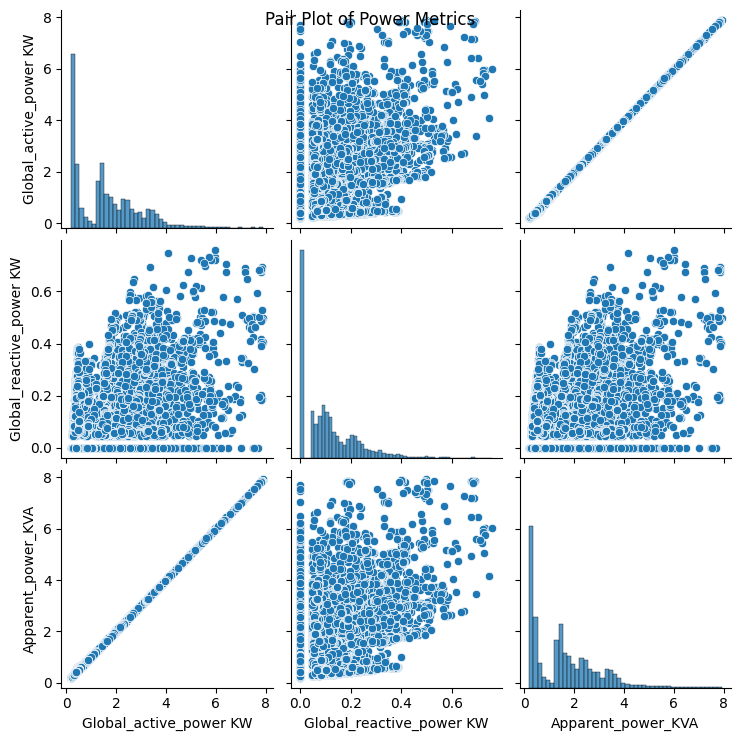

In [16]:
sns.pairplot(power[['Global_active_power KW', 'Global_reactive_power KW', 'Apparent_power_KVA']])
plt.suptitle('Pair Plot of Power Metrics')
plt.show()

In [21]:
power.to_csv('cleaned_Nwe_power.csv', index=False)

<h1>Sub Metering Cleaning<h1>

In [9]:
sub=pd.read_excel(r"D:\My Projects\grad project.DEPI\HOUSE_POWER_PROJECT\HOUSE_POWER_PROJECT\Data set\sub_meterings.xlsx")
sub

,Index,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1,4.216,0,1,17
1,2,5.360,0,1,16
2,3,5.374,0,2,17
3,4,5.388,0,1,17
4,5,3.666,0,1,17
...,...,...,...,...,...
13351,13352,0.404,0,0,0
13352,13353,0.402,0,0,0
13353,13354,0.402,0,0,0
13354,13355,0.402,0,0,0


In [10]:
sub.dtypes

Index                    int64
Global_active_power    float64
Sub_metering_1           int64
Sub_metering_2           int64
Sub_metering_3           int64
dtype: object

In [11]:
new_columns_name = {
    'Global_active_power':'Global_active_power KW',
    'Sub_metering_1':'Sub_metering_1 J',
    'Sub_metering_2':'Sub_metering_2 J',
    'Sub_metering_3':'Sub_metering_3 J'
    }
sub.rename(columns = new_columns_name, inplace = True)
sub

,Index,Global_active_power KW,Sub_metering_1 J,Sub_metering_2 J,Sub_metering_3 J
0,1,4.216,0,1,17
1,2,5.360,0,1,16
2,3,5.374,0,2,17
3,4,5.388,0,1,17
4,5,3.666,0,1,17
...,...,...,...,...,...
13351,13352,0.404,0,0,0
13352,13353,0.402,0,0,0
13353,13354,0.402,0,0,0
13354,13355,0.402,0,0,0


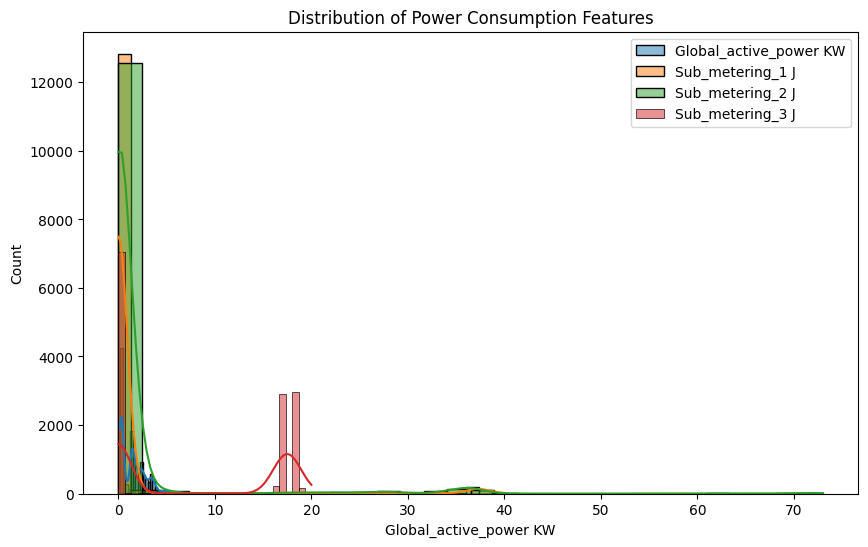

In [12]:
plt.figure(figsize=(10, 6))
for column in ['Global_active_power KW', 'Sub_metering_1 J', 'Sub_metering_2 J', 'Sub_metering_3 J']:
    sns.histplot(sub[column], kde=True, label=column, bins=30)
plt.title('Distribution of Power Consumption Features')
plt.legend()
plt.show()

In [13]:
sub.to_csv('cleaned_sub_meterings.csv', index=False)

<h1> Voltage Current Cleaning<h1>

In [40]:
voltage=pd.read_excel(r"D:\My Projects\grad project.DEPI\HOUSE_POWER_PROJECT\HOUSE_POWER_PROJECT\Data set\VOLTAGE_CURRENT.xlsx")
voltage

,Index,Date,Time,Voltage,Global_intensity
0,1,16/12/2006,17:24:00,234.84,18.4
1,2,16/12/2006,17:25:00,233.63,23.0
2,3,16/12/2006,17:26:00,233.29,23.0
3,4,16/12/2006,17:27:00,233.74,23.0
4,5,16/12/2006,17:28:00,235.68,15.8
...,...,...,...,...,...
13351,13352,2008-09-01 00:00:00,23:55:00,244.58,1.8
13352,13353,2008-09-01 00:00:00,23:56:00,243.69,1.8
13353,13354,2008-09-01 00:00:00,23:57:00,244.06,1.8
13354,13355,2008-09-01 00:00:00,23:58:00,244.27,1.8


In [41]:
voltage.dtypes

Index                 int64
Date                 object
Time                 object
Voltage             float64
Global_intensity    float64
dtype: object

In [42]:
from datetime import datetime
voltage['Time'] = voltage['Time'].apply(lambda x: x if isinstance(x, datetime) else datetime.strptime(str(x), '%H:%M:%S').time())

In [43]:
new_columns_name = {
    'Voltage':'Voltage V',
    'Global_intensity':'Global_intensity A'
    }
voltage.rename(columns = new_columns_name, inplace = True)
voltage

,Index,Date,Time,Voltage V,Global_intensity A
0,1,16/12/2006,17:24:00,234.84,18.4
1,2,16/12/2006,17:25:00,233.63,23.0
2,3,16/12/2006,17:26:00,233.29,23.0
3,4,16/12/2006,17:27:00,233.74,23.0
4,5,16/12/2006,17:28:00,235.68,15.8
...,...,...,...,...,...
13351,13352,2008-09-01 00:00:00,23:55:00,244.58,1.8
13352,13353,2008-09-01 00:00:00,23:56:00,243.69,1.8
13353,13354,2008-09-01 00:00:00,23:57:00,244.06,1.8
13354,13355,2008-09-01 00:00:00,23:58:00,244.27,1.8


In [44]:
voltage['Date']=voltage['Date'].astype(str)

voltage['Date'] = voltage['Date'].str.replace('00:00:00', '', regex = False).str.strip()
voltage

,Index,Date,Time,Voltage V,Global_intensity A
0,1,16/12/2006,17:24:00,234.84,18.4
1,2,16/12/2006,17:25:00,233.63,23.0
2,3,16/12/2006,17:26:00,233.29,23.0
3,4,16/12/2006,17:27:00,233.74,23.0
4,5,16/12/2006,17:28:00,235.68,15.8
...,...,...,...,...,...
13351,13352,2008-09-01,23:55:00,244.58,1.8
13352,13353,2008-09-01,23:56:00,243.69,1.8
13353,13354,2008-09-01,23:57:00,244.06,1.8
13354,13355,2008-09-01,23:58:00,244.27,1.8


In [45]:
voltage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13356 entries, 0 to 13355
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               13356 non-null  int64  
 1   Date                13356 non-null  object 
 2   Time                13356 non-null  object 
 3   Voltage V           13356 non-null  float64
 4   Global_intensity A  13356 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 521.8+ KB


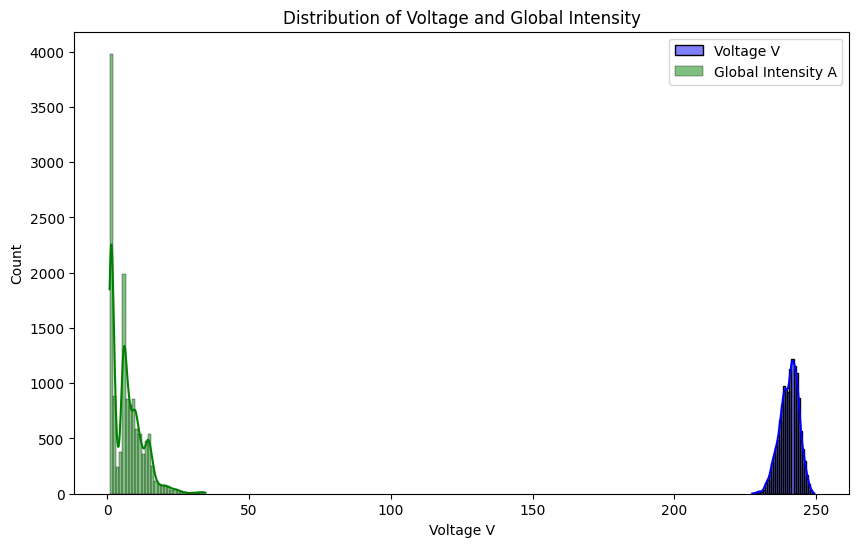

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(voltage['Voltage V' ], kde=True, color='blue', label='Voltage V', bins=30)
sns.histplot(voltage['Global_intensity A'], kde=True, color='green', label='Global Intensity A', bins=30)
plt.title('Distribution of Voltage and Global Intensity')
plt.legend()
plt.show()

In [47]:
voltage.to_csv('cleaned_voltage_current.csv', index=False)